In [3]:
import pandas as pd
data = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/research/MCarloLongRuns/data/data2.csv")
print(data)
import matplotlib.pyplot as plt
import seaborn as sns



       Unnamed: 0     F      H  WShare_NT  WShare_VI  WShare_TF  SharpeNT  \
0               0  0.10  756.0  34.769446  37.727940  27.502614  0.363728   
1               1  0.10  756.0  39.152817  38.617571  22.229612  0.449156   
2               2  0.10  756.0  34.593041  35.692292  29.714666  0.366437   
3               3  0.10  756.0  28.265896  54.258294  17.475810  0.694857   
4               4  0.10  756.0  34.610598  36.393917  28.995486  0.365813   
...           ...   ...    ...        ...        ...        ...       ...   
19495       19495  1.95  504.0  31.755050  46.864907  21.380043  0.789381   
19496       19496  1.95  504.0  28.054688  49.502846  22.442466  1.222413   
19497       19497  1.95  504.0  26.166443  56.746804  17.086753  0.691226   
19498       19498  1.95  504.0  39.011562  39.237729  21.750709  0.431884   
19499       19499  1.95  504.0  31.248959  40.980677  27.770365  0.740173   

       SharpeVI  SharpeTF  DeltaNTVI  DeltaNTTF  DeltaVITF  AvgSignificance

In [ ]:
def mean_without_outlier(x): # x: series
    iqr = x.quantile(.75) - x.quantile(.25)
    y = x[x.between(x.quantile(.25) - 1.5*iqr, x.quantile(.75) + 1.5*iqr)]
    return y.mean()

# How does investment change ecology dynamics?

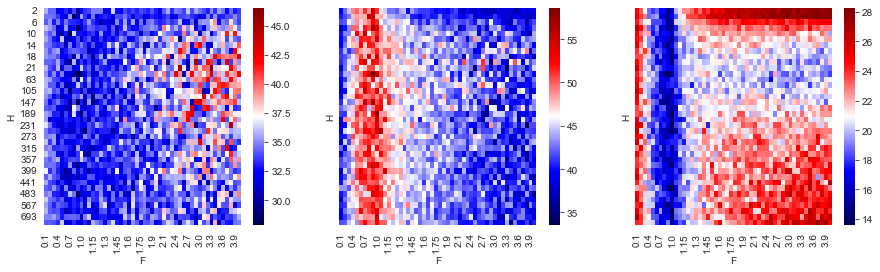

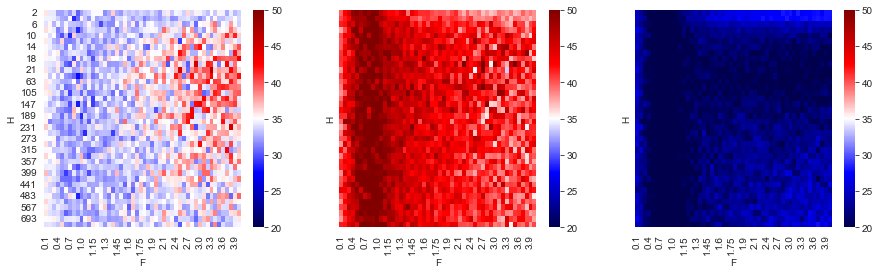

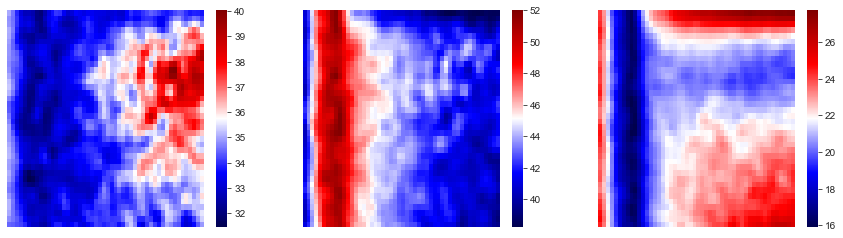

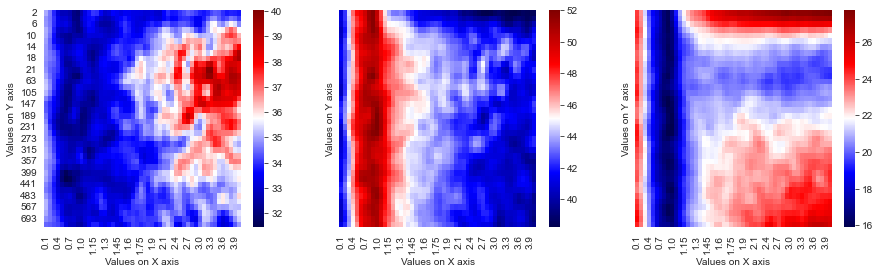

In [144]:
''' Raw data'''
# data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data2 = data.copy()
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
# data_temp['T'] = gaussian_filter(data2['WShare_NT'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=1)

data_temp['T'] = data2['WShare_VI']
# data_temp['T'] = gaussian_filter(data2['WShare_VI'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=1)

data_temp['T'] = data2['WShare_TF']
# data_temp['T'] = gaussian_filter(data2['WShare_TF'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
vmin, vmax = 0, 50 # , vmin = vmin, vmax = vmax as arg of heatmap
cmap = 'seismic'
model = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
plt.show()

''' With common Z axis '''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
vmin, vmax = 20, 50 # ,  as arg of heatmap
cmap = 'seismic'
sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap, vmin = vmin, vmax = vmax)
plt.show()

''' With smoothing '''
from scipy.ndimage.filters import gaussian_filter
sigma = 1
# data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data2 = data.copy()
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=sigma)

data_temp['T'] = data2['WShare_VI']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=sigma)
# print(data_pivotedVI)

data_temp['T'] = data2['WShare_TF']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=sigma)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
vmin, vmax = 0, 50 # , vmin = vmin, vmax = vmax as arg of heatmap
cmap = 'seismic'
sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap, yticklabels=False, xticklabels=False)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap, yticklabels=False, xticklabels=False)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap, yticklabels=False, xticklabels=False)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4), sharey=True, sharex=True)
cmap = 'seismic'
fig1 = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
fig2 = sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
fig3 = sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax1.set_xlabel("Values on X axis")
ax1.set_ylabel("Values on Y axis")
ax2.set_xlabel("Values on X axis")
ax2.set_ylabel("Values on Y axis")
ax3.set_xlabel("Values on X axis")
ax3.set_ylabel("Values on Y axis")
plt.show()




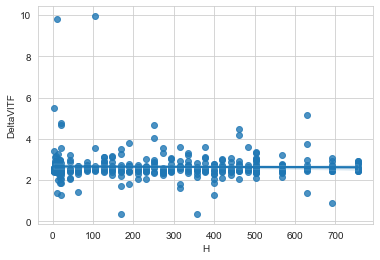

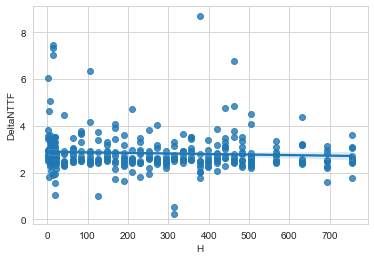

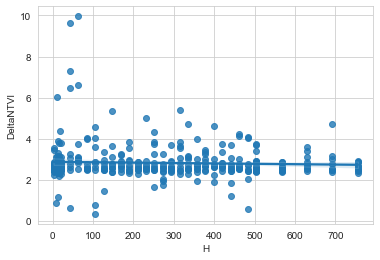

/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_20414/1526493901.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['SumDelta'] = (data3['DeltaVITF'] + data3['DeltaNTTF'] + data3['DeltaNTVI']) / 3


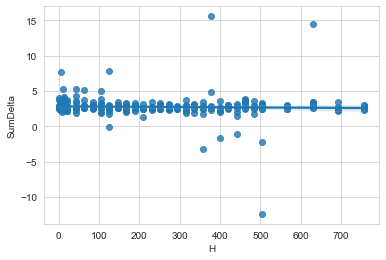

In [5]:
data2 = data.loc[data['F'] == 1.5]
data3 = data2.loc[(data2['DeltaVITF'] > 0) & (data2['DeltaVITF'] < 10)]

sns.regplot(x='H', y='DeltaVITF', data=data3)
# plt.ylim(0,10)
plt.show()


data3 = data2.loc[(data2['DeltaNTTF'] > 0) & (data2['DeltaNTTF'] < 10)]

sns.regplot(x='H', y='DeltaNTTF', data=data3)
# plt.ylim(0,10)
plt.show()

data3 = data2.loc[(data2['DeltaNTVI'] > 0) & (data2['DeltaNTVI'] < 10)]

sns.regplot(x='H', y='DeltaNTVI', data=data3)
# plt.ylim(0,10)
plt.show()

data['SumDelta'] = (data['DeltaVITF'] + data['DeltaNTTF'] + data['DeltaNTVI']) / 3
data3['SumDelta'] = (data3['DeltaVITF'] + data3['DeltaNTTF'] + data3['DeltaNTVI']) / 3

sns.regplot(x='H', y='SumDelta', data=data3)
# plt.ylim(0,4)
plt.show()

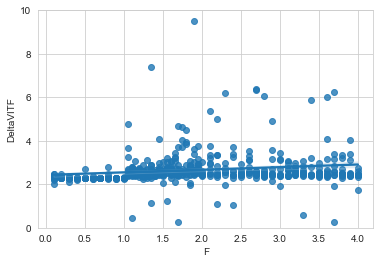

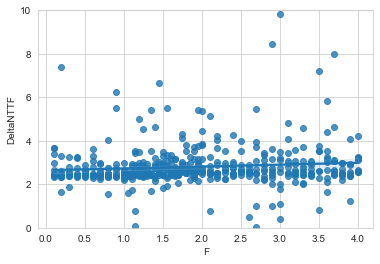

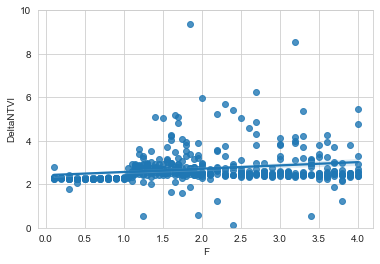

/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_20414/4046493051.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['SumDelta'] = (data3['DeltaVITF'] + data3['DeltaNTTF'] + data3['DeltaNTVI']) / 3


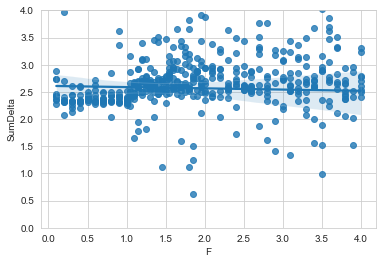

In [6]:
data2 = data.loc[data['H'] == 231]
data3 = data2.loc[(data2['DeltaVITF'] > 0) & (data2['DeltaVITF'] < 10)]

sns.regplot(x='F', y='DeltaVITF', data=data3)
plt.ylim(0,10)
plt.show()


data3 = data2.loc[(data2['DeltaNTTF'] > 0) & (data2['DeltaNTTF'] < 10)]

sns.regplot(x='F', y='DeltaNTTF', data=data3)
plt.ylim(0,10)
plt.show()

data3 = data2.loc[(data2['DeltaNTVI'] > 0) & (data2['DeltaNTVI'] < 10)]

sns.regplot(x='F', y='DeltaNTVI', data=data3)
plt.ylim(0,10)
plt.show()

data3['SumDelta'] = (data3['DeltaVITF'] + data3['DeltaNTTF'] + data3['DeltaNTVI']) / 3

sns.regplot(x='F', y='SumDelta', data=data3)
plt.ylim(0,4)
plt.show()

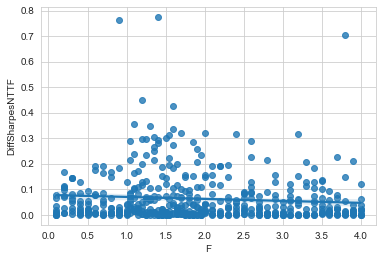

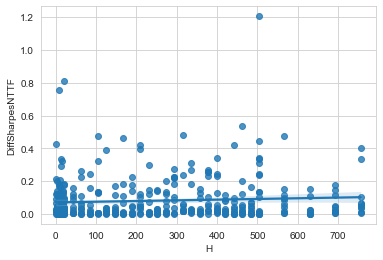

In [7]:
data['DiffSharpesNTTF'] = (data['SharpeNT'] - data['SharpeTF']) ** 2
data2 = data.loc[data['H'] == 231]
sns.regplot(x='F', y='DiffSharpesNTTF', data=data2)
plt.show()

data2 = data.loc[data['F'] == 1.5]
sns.regplot(x='H', y='DiffSharpesNTTF', data=data2)
plt.show()


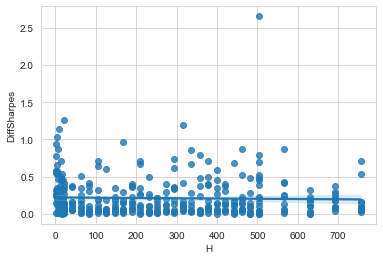

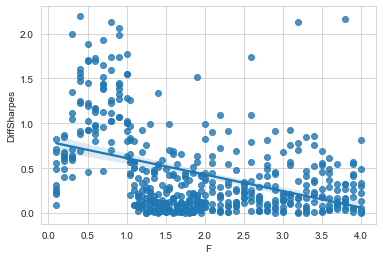

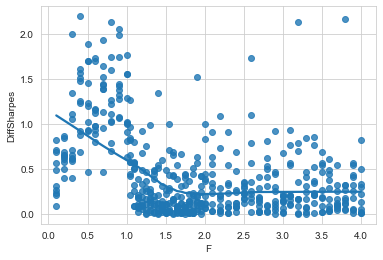

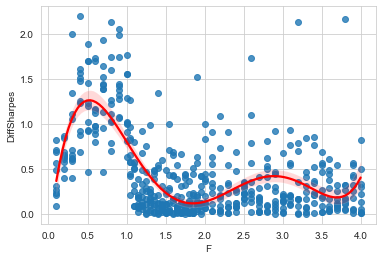

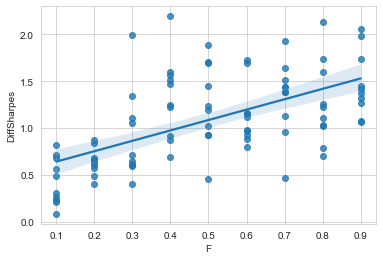

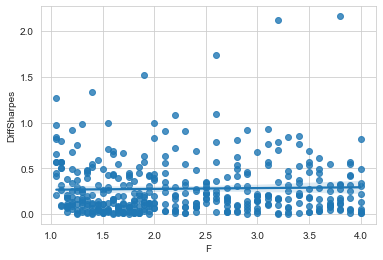

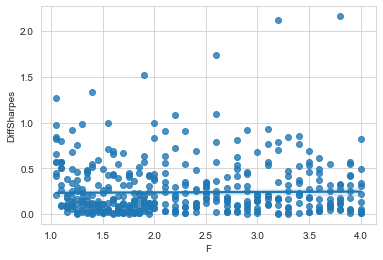

In [8]:
data['DiffSharpes'] = (data['SharpeNT'] - data['SharpeTF']) ** 2 + (data['SharpeNT'] - data['SharpeVI']) ** 2 + (data['SharpeVI'] - data['SharpeTF']) ** 2 


data2 = data.loc[data['F'] == 1.5]
sns.regplot(x='H', y='DiffSharpes', data=data2)
plt.show()

data2 = data.loc[data['H'] == 231]
sns.regplot(x='F', y='DiffSharpes', data=data2)
plt.show()

data2 = data.loc[data['H'] == 231]
sns.regplot(x='F', y='DiffSharpes', data=data2, lowess=True)
plt.show()

data2 = data.loc[data['H'] == 231]
sns.regplot(x='F', y='DiffSharpes', data=data2, order = 5, line_kws ={"color":"red"})
plt.show()


data2 = data.loc[(data['H'] == 231) & (data['F'] < 1.0)]
sns.regplot(x='F', y='DiffSharpes', data=data2)
plt.show()

data2 = data.loc[(data['H'] == 231) & (data['F'] > 1.0)]
sns.regplot(x='F', y='DiffSharpes', data=data2)
plt.show()

data2 = data.loc[(data['H'] == 231) & (data['F'] > 1.0)]
sns.regplot(x='F', y='DiffSharpes', data=data2, robust = True)
plt.show()





In [10]:
print(data.columns)

Index(['Unnamed: 0', 'F', 'H', 'WShare_NT', 'WShare_VI', 'WShare_TF',
       'SharpeNT', 'SharpeVI', 'SharpeTF', 'DeltaNTVI', 'DeltaNTTF',
       'DeltaVITF', 'AvgSignificance', 'AvgNumberDev', 'PerSignif', 'SumDelta',
       'DiffSharpesNTTF', 'DiffSharpes'],
      dtype='object')


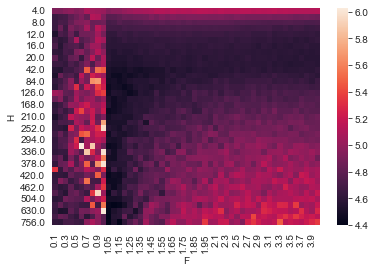

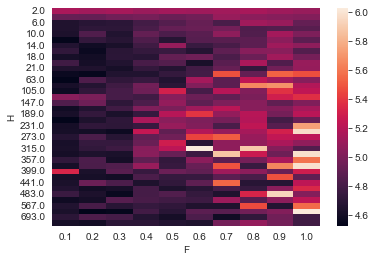

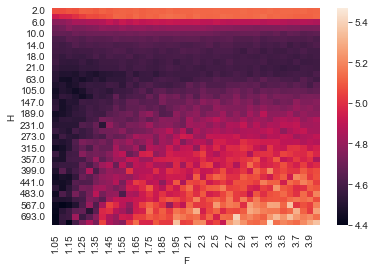

In [11]:
''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 )]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['AvgSignificance']
data_temp['T'] = data2['AvgNumberDev']+ 1.96 * 2
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

data2 = data.loc[(data['F'] <= 1.0) & (data['F'] > 0.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['AvgSignificance']
data_temp['T'] = data2['AvgNumberDev']+ 1.96 * 2
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

data2 = data.loc[(data['F'] > 1.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['AvgSignificance']
data_temp['T'] = data2['AvgNumberDev']+ 1.96 * 2
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

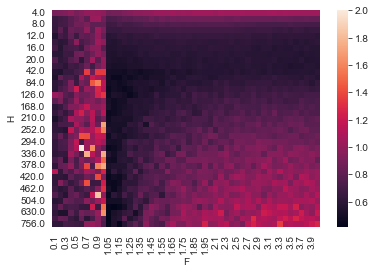

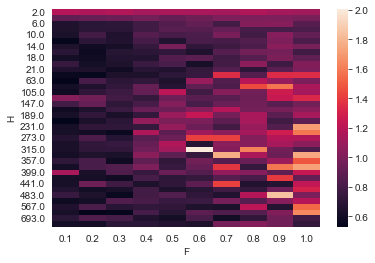

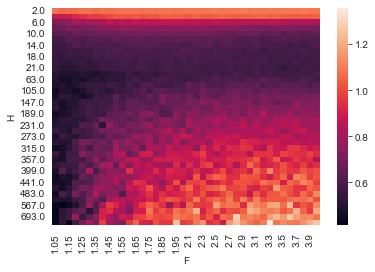

In [12]:
''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 )]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['AvgSignificance']
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

data2 = data.loc[(data['F'] <= 1.0) & (data['F'] > 0.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['AvgSignificance']
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

data2 = data.loc[(data['F'] > 1.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['AvgSignificance']
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

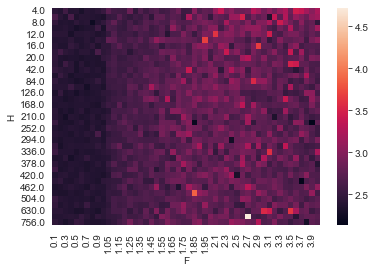

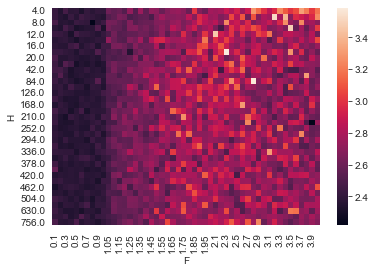

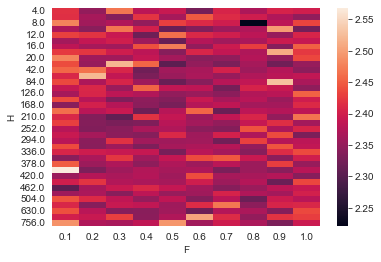

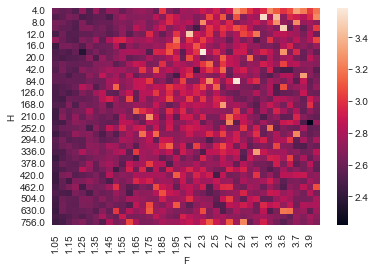

In [14]:
''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['SumDelta']
# mean() is too noisy, median is quite sharp a cut. 
data_temp = data_temp.groupby(['F', 'H'], as_index=False).agg(mean_without_outlier)
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['SumDelta']
# mean() is too noisy, median is quite sharp a cut. 
data_temp = data_temp.groupby(['F', 'H'], as_index=False).median()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0) & (data['F'] <= 1.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['SumDelta']
# mean() is too noisy, median is quite sharp a cut. 
data_temp = data_temp.groupby(['F', 'H'], as_index=False).median()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0) & (data['F'] > 1.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['SumDelta']
# mean() is too noisy, median is quite sharp a cut. 
data_temp = data_temp.groupby(['F', 'H'], as_index=False).median()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()





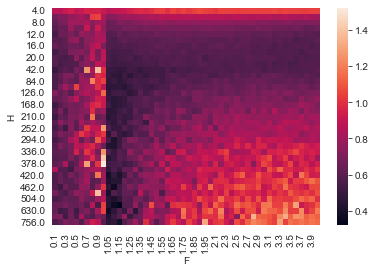

In [15]:
''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['AvgSignificance']
# mean() is too noisy, median is quite sharp a cut. 
data_temp = data_temp.groupby(['F', 'H'], as_index=False).median()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

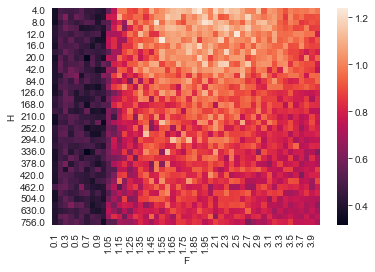

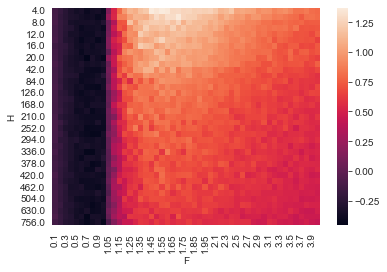

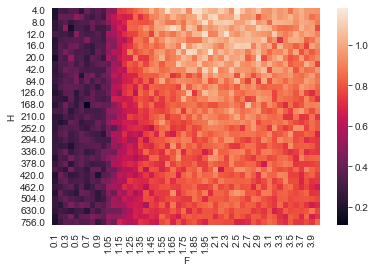

In [16]:
''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['SharpeNT']
# mean() is too noisy, median is quite sharp a cut. 
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['SharpeVI']
# mean() is too noisy, median is quite sharp a cut. 
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

''' significance, H and F'''
data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H']
data_temp['T'] = data2['SharpeTF']
# mean() is too noisy, median is quite sharp a cut. 
data_temp = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted = data_temp.pivot(index='H', columns='F', values = 'T')
ax = sns.heatmap(data_pivoted)
plt.show()

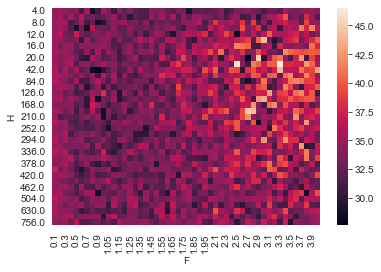

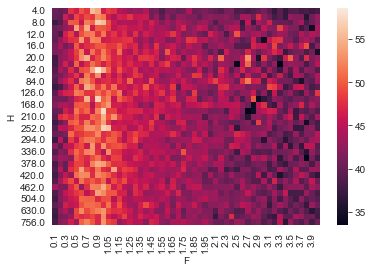

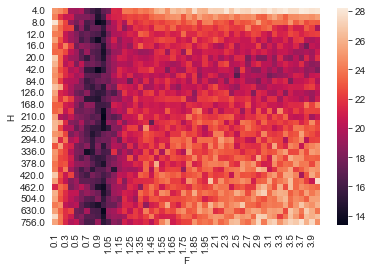